## IRIS FLOWER CLASSIFICATION

Iris flower has three species-
Iris-setosa, Iris-versicolor, and Iris-virginica.

#### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import matplotlib

#### Loading Libraries

In [2]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Loading Dataset

In [3]:
df = pd.read_csv('P:/nbn/Placements/CipherByte Technologies/CBTCIP-master/Iris Flower Classification/Iris Flower - Iris.csv')

In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df['Species'].value_counts() ##Dispalying no of samples on each class

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df = df.drop(columns = ['Id']) ## Deleting column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Dataset Preprocessing

In [8]:
## Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Exploratory Data Analysis

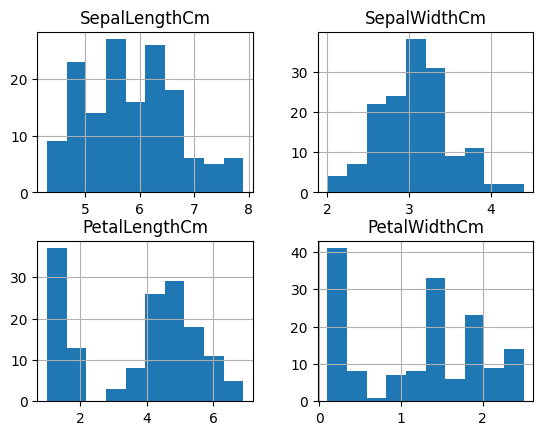

In [9]:
df.hist()
plt.show()

In [10]:
## Scatterplot
colors = ['red','blue','green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

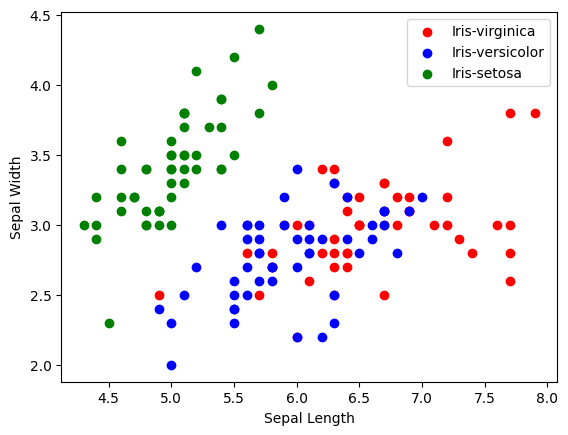

In [11]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'] , x['SepalWidthCm'] , c=colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

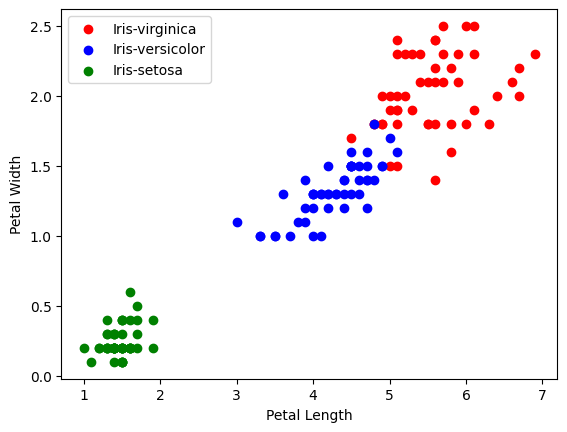

In [12]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'] , x['PetalWidthCm'] , c=colors[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

#### Creation of corelation Matrix

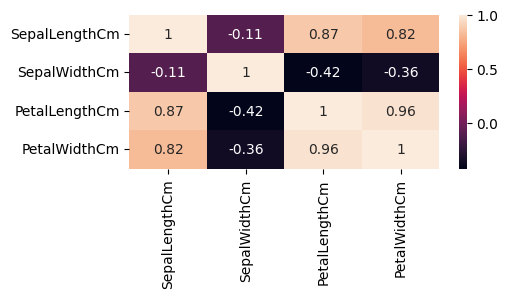

In [13]:
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
fig,ax = plt.subplots(figsize=(5,2))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

#### Encoding Dataset

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['Species'] = le.fit_transform(df['Species'])
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### **Model Training**

In [16]:
# train -70
# test -30
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y =df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Prediction of the iris species for the test set
y_pred = logreg.predict(X_test)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9777777777777777


In [18]:
# K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# Prediction of the iris species for the test set
y_pred = knn.predict(X_test)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9777777777777777


In [19]:
# Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Calculating the accuracy of the model
accuracy = dtc.score(X_test, y_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [20]:
## Support Vector Machine classifier
svm = SVC()
svm.fit(X_train, y_train)
accuracy = svm.score(X_test,y_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [21]:
# Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9333333333333333


In [23]:
'''### Linear Discriminant Analysis
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions, using the transform method.
'''

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy = lda.score(X_test,y_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9777777777777777
